In [1]:
from tensorboard.backend.event_processing import event_accumulator
from matplotlib import pyplot as plt 
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

In [2]:
plt.style.use('../computermodernstyle.mplstyle')

In [3]:
eventfiles = [
    '../../ee_to_ttbar/runs/unweighted/events.out.tfevents.1605369985.roadrunner.22874.0',
    '../../ee_to_ttbar/runs/weighted_max_run/events.out.tfevents.1605883545.roadrunner.19782.0',
    '../../ee_to_ttbar/runs/weighted_mean_run/events.out.tfevents.1605786229.roadrunner.13957.0',
    '../../ee_to_ttbar/runs/weighted_min_run/events.out.tfevents.1605786429.roadrunner.14062.0',
    '../../pp_to_ttbar/runs/negative_weights_run/events.out.tfevents.1605890428.roadrunner.20912.0',
]
eventnames = ['Unweighted (all)', 'Unweighted', 'Mean weighted', 'Weighted', 'negative weights']
eventtype = ['ee', 'ee', 'ee', 'ee', 'pp']

## ee -> ttbar metrics

In [4]:
ee_ess = {}
ee_loss_train = {}
ee_loss_test = {}

for i in range(len(eventfiles)):
    # Filter out proton events
    if eventtype[i] != 'ee':
        continue
    # Open event file
    ea = event_accumulator.EventAccumulator(eventfiles[i])
    ea.Reload()
    # Construct simple lists from event accumulator
    name = eventnames[i]
    ## Ess
    tmp = ea.Scalars('Effective_sample_size')
    ee_ess[name] = [tmp[j].value for j in range(len(tmp))]
    ## Loss train
    tmp = ea.Scalars('Loss_train')
    ee_loss_train[name] = [tmp[j].value for j in range(len(tmp))]
    ## Loss test
    tmp = ea.Scalars('Loss_test')
    ee_loss_test[name] = [tmp[j].value for j in range(len(tmp))]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


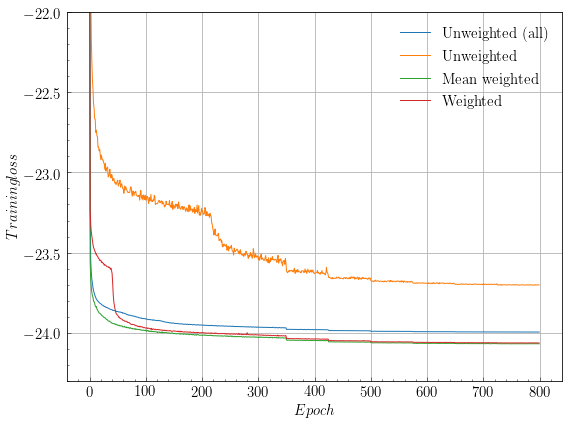

In [5]:
plt.figure(figsize=(8,6))
for k, v in ee_loss_train.items():
    plt.plot(v, label=k.replace('_', ' '))
plt.legend()
plt.xlabel(r'$Epoch$')
plt.ylabel(r'$Training loss$')
plt.ylim([-24.3, -22])
plt.grid()
plt.savefig("ee_training_loss.pdf")

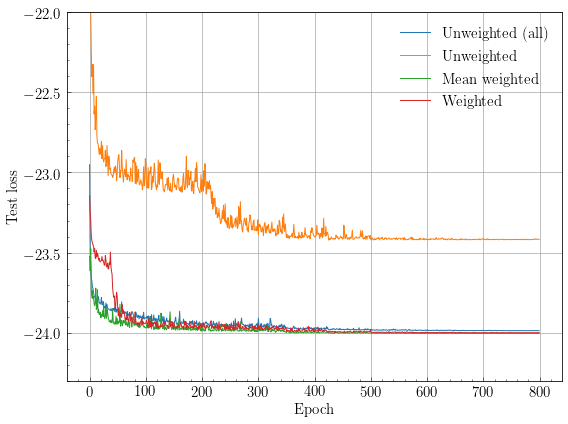

In [6]:
plt.figure(figsize=(8,6))
for k, v in ee_loss_test.items():
    plt.plot(v, label=k.replace('_', ' '))
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Test loss")
plt.ylim([-24.3, -22])
plt.grid()
plt.savefig("ee_test_loss.pdf")

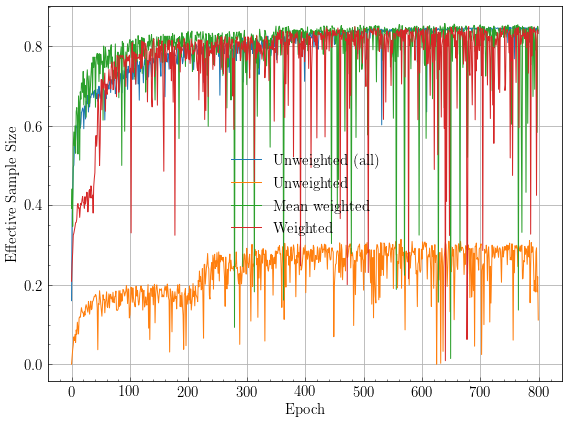

In [7]:
plt.figure(figsize=(8,6))
for k, v in ee_ess.items():
    plt.plot(v, label=k.replace('_', ' '))
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Effective Sample Size")
plt.grid()
plt.savefig("ee_ess.pdf")

In [8]:
## pp -> ttbar metrics

In [9]:
pp_loss_train = {}
pp_loss_test = {}

for i in range(len(eventfiles)):
    # Filter out proton events
    if eventtype[i] != 'pp':
        continue
    # Open event file
    ea = event_accumulator.EventAccumulator(eventfiles[i])
    ea.Reload()
    # Construct simple lists from event accumulator
    name = "{}_{}".format(eventtype[i], eventnames[i])
    ## Loss train
    tmp = ea.Scalars('Loss_train')
    pp_loss_train[name] = [tmp[j].value for j in range(len(tmp))]
    ## Loss test
    tmp = ea.Scalars('Loss_test')
    pp_loss_test[name] = [tmp[j].value for j in range(len(tmp))]

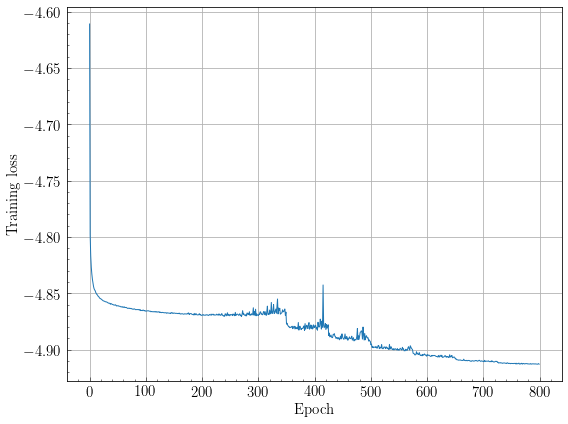

In [10]:
plt.figure(figsize=(8,6))
for k, v in pp_loss_train.items():
    plt.plot(v, label=k.replace('_', ' '))
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.grid()
plt.savefig("pp_training_loss.pdf")

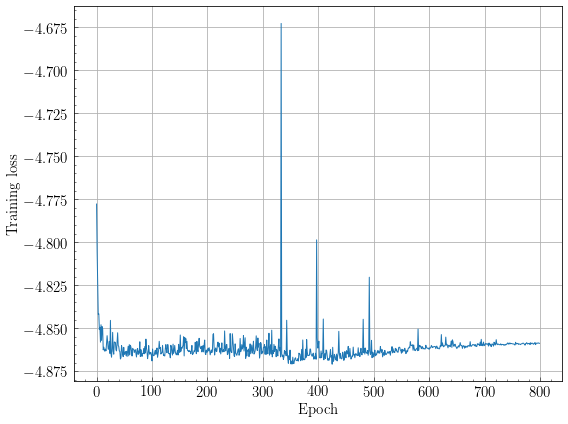

In [11]:
plt.figure(figsize=(8,6))
for k, v in pp_loss_test.items():
    plt.plot(v, label=k.replace('_', ' '))
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.grid()
plt.savefig("pp_test_loss.pdf")